In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.svm import NuSVC
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
dataframe = pd.read_csv('datafile.csv')
dataframe

,Unnamed: 0,StudyArm,DiseaseSite,Sex,PreviousChemo,AgeStudyEntry,PrimaryorMet,Comorbidities,DaysonStudy,PhysicalWB_Baseline,...,C30_Role_0,C30_Social_0,NoofAdmissions,NoofTriageEvents,ChangestoChemo,QoLEQ5DMob,QoLEQ5DSelCar,QoLEQ5DUsuAct,QoLEQ5DPain,QoLEQ5DAnxDep
0,0,1,1,2,0,43,1,1,126,27.0,...,0.000000,33.333333,2,2,1,1.0,1.0,1.0,1.0,1.0
1,1,1,1,2,0,52,1,0,126,24.0,...,66.666667,83.333333,0,0,0,1.0,1.0,1.0,1.0,2.0
2,2,2,1,2,0,51,1,0,126,24.0,...,50.000000,83.333333,0,0,1,1.0,1.0,1.0,2.0,2.0
3,3,2,1,2,0,58,1,0,126,26.0,...,16.666667,50.000000,0,1,0,1.0,1.0,2.0,2.0,2.0
4,4,1,1,2,0,49,1,0,126,27.0,...,100.000000,100.000000,0,1,1,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,503,1,1,2,0,67,1,0,39,18.0,...,50.000000,66.666667,0,2,1,1.0,1.0,1.0,1.0,1.0
504,504,1,3,1,0,50,2,1,126,23.0,...,100.000000,66.666667,0,0,0,1.0,2.0,2.0,1.0,2.0
505,505,2,1,2,0,55,1,0,126,24.0,...,100.000000,100.000000,0,0,1,1.0,1.0,1.0,1.0,1.0
506,506,1,1,2,0,54,1,0,126,24.0,...,66.666667,66.666667,0,1,1,NaN,NaN,NaN,NaN,NaN


In [3]:
dataframe = dataframe.drop(['Unnamed: 0', 'StudyArm'], axis=1)

In [4]:
admissions = []
for i in dataframe['NoofAdmissions']:
    if i == 0:
        admissions.append(0)
    else: 
        admissions.append(1)
        
dataframe['admissions'] = admissions

triage = []
for i in dataframe['NoofTriageEvents']:
    if i == 0:
        triage.append(0)
    else: 
        triage.append(1)
        
dataframe['triage'] = triage

chemo_change = []
for i in dataframe['ChangestoChemo']:
    if i == 0:
        chemo_change.append(0)
    else: 
        chemo_change.append(1)
        
dataframe['chemo_change'] = chemo_change
dataframe = dataframe.drop(['NoofTriageEvents','ChangestoChemo','NoofAdmissions'], axis=1)
dataframe

,DiseaseSite,Sex,PreviousChemo,AgeStudyEntry,PrimaryorMet,Comorbidities,DaysonStudy,PhysicalWB_Baseline,SocialWB_Baseline,EmotionalWB_Baseline,...,C30_Role_0,C30_Social_0,QoLEQ5DMob,QoLEQ5DSelCar,QoLEQ5DUsuAct,QoLEQ5DPain,QoLEQ5DAnxDep,admissions,triage,chemo_change
0,1,2,0,43,1,1,126,27.0,28.000000,21.0,...,0.000000,33.333333,1.0,1.0,1.0,1.0,1.0,1,1,1
1,1,2,0,52,1,0,126,24.0,4.000000,7.0,...,66.666667,83.333333,1.0,1.0,1.0,1.0,2.0,0,0,0
2,1,2,0,51,1,0,126,24.0,24.500000,17.0,...,50.000000,83.333333,1.0,1.0,1.0,2.0,2.0,0,0,1
3,1,2,0,58,1,0,126,26.0,21.000000,21.0,...,16.666667,50.000000,1.0,1.0,2.0,2.0,2.0,0,1,0
4,1,2,0,49,1,0,126,27.0,26.000000,12.0,...,100.000000,100.000000,1.0,1.0,1.0,1.0,3.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1,2,0,67,1,0,39,18.0,28.000000,20.0,...,50.000000,66.666667,1.0,1.0,1.0,1.0,1.0,0,1,1
504,3,1,0,50,2,1,126,23.0,19.000000,9.0,...,100.000000,66.666667,1.0,2.0,2.0,1.0,2.0,0,0,0
505,1,2,0,55,1,0,126,24.0,23.333333,22.0,...,100.000000,100.000000,1.0,1.0,1.0,1.0,1.0,0,0,1
506,1,2,0,54,1,0,126,24.0,26.000000,15.0,...,66.666667,66.666667,NaN,NaN,NaN,NaN,NaN,0,1,1


In [5]:
dataframe.isna().sum()

DiseaseSite               0
Sex                       0
PreviousChemo             0
AgeStudyEntry             0
PrimaryorMet              0
Comorbidities             0
DaysonStudy               0
PhysicalWB_Baseline      13
SocialWB_Baseline         6
EmotionalWB_Baseline      5
FunctionalWB_Baseline     3
C30_Appetite_0           91
C30_Dyspnoea_0           91
C30_Pain_0               91
C30_Fatigue_0            91
C30_NauseaVom_0          93
C30_Const_0              94
C30_Diarr_0              92
C30_Financ_0             91
C30_GlobalHealth_0       92
C30_Cognitive_0          91
C30_Sleep_0              92
C30_Emotional_0          91
C30_Physical_0           91
C30_Role_0                4
C30_Social_0              4
QoLEQ5DMob                5
QoLEQ5DSelCar             4
QoLEQ5DUsuAct             4
QoLEQ5DPain               6
QoLEQ5DAnxDep             7
admissions                0
triage                    0
chemo_change              0
dtype: int64

In [6]:
data_all = dataframe.dropna(subset=['C30_Appetite_0'])
data_clinical = dataframe.iloc[:, [0,1,2,3,4,5,6,31,32,33]]
data_proms = dataframe.drop (['DiseaseSite', 'Sex', 'PreviousChemo', 'AgeStudyEntry', 'PrimaryorMet',
                              'Comorbidities', 'DaysonStudy'], axis=1)
data_C30 = dataframe.drop (['QoLEQ5DMob', 'QoLEQ5DSelCar', 'QoLEQ5DUsuAct', 'QoLEQ5DPain','QoLEQ5DAnxDep',
                            'PhysicalWB_Baseline', 'SocialWB_Baseline', 'EmotionalWB_Baseline',
                            'FunctionalWB_Baseline'], axis=1)
data_5D = dataframe.drop(['C30_Appetite_0', 'C30_Dyspnoea_0', 'C30_Pain_0', 'C30_Fatigue_0',
                          'C30_NauseaVom_0', 'C30_Const_0', 'C30_Diarr_0', 'C30_Financ_0',
                          'C30_GlobalHealth_0', 'C30_Cognitive_0', 'C30_Sleep_0',
                          'C30_Emotional_0', 'C30_Physical_0', 'C30_Role_0', 'C30_Social_0','PhysicalWB_Baseline', 
                          'SocialWB_Baseline', 'EmotionalWB_Baseline',
                            'FunctionalWB_Baseline'], axis = 1)
data_fact = dataframe.drop(['C30_Appetite_0', 'C30_Dyspnoea_0', 'C30_Pain_0', 'C30_Fatigue_0',
                          'C30_NauseaVom_0', 'C30_Const_0', 'C30_Diarr_0', 'C30_Financ_0',
                          'C30_GlobalHealth_0', 'C30_Cognitive_0', 'C30_Sleep_0',
                          'C30_Emotional_0', 'C30_Physical_0', 'C30_Role_0', 'C30_Social_0', 'QoLEQ5DMob', 
                            'QoLEQ5DSelCar', 'QoLEQ5DUsuAct', 'QoLEQ5DPain','QoLEQ5DAnxDep'], axis = 1)
data_proms = data_proms.dropna(subset=['C30_Appetite_0'])
data_C30 = data_C30.dropna(subset=['C30_Appetite_0'])

In [7]:
data_5D.columns

Index(['DiseaseSite', 'Sex', 'PreviousChemo', 'AgeStudyEntry', 'PrimaryorMet',
       'Comorbidities', 'DaysonStudy', 'QoLEQ5DMob', 'QoLEQ5DSelCar',
       'QoLEQ5DUsuAct', 'QoLEQ5DPain', 'QoLEQ5DAnxDep', 'admissions', 'triage',
       'chemo_change'],
      dtype='object')

In [8]:
imputer = KNNImputer(n_neighbors=5)
data_all = pd.DataFrame(imputer.fit_transform(data_all),columns = data_all.columns)
data_clinical = pd.DataFrame(imputer.fit_transform(data_clinical),columns = data_clinical.columns)
data_proms = pd.DataFrame(imputer.fit_transform(data_proms),columns = data_proms.columns)
data_C30 = pd.DataFrame(imputer.fit_transform(data_C30),columns = data_C30.columns)
data_5D = pd.DataFrame(imputer.fit_transform(data_5D),columns = data_5D.columns)
data_fact = pd.DataFrame(imputer.fit_transform(data_fact),columns = data_fact.columns)
print (len(data_all), len(data_all.columns))
print (len(data_clinical), len(data_clinical.columns))
print (len(data_proms), len(data_proms.columns))
print (len(data_C30), len(data_C30.columns))
print (len(data_5D), len(data_5D.columns))
print (len(data_fact), len(data_fact.columns))

417 34
508 10
417 27
417 25
508 15
508 14


In [9]:
correlated_features = set()
correlation_matrix = data_all.corr()
threshold = 0.5

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'QoLEQ5DSelCar', 'Sex', 'C30_Appetite_0', 'C30_Fatigue_0', 'C30_Physical_0', 'FunctionalWB_Baseline', 'C30_NauseaVom_0', 'C30_Emotional_0', 'QoLEQ5DMob', 'C30_Role_0', 'QoLEQ5DUsuAct', 'C30_Pain_0', 'QoLEQ5DAnxDep', 'QoLEQ5DPain', 'C30_GlobalHealth_0', 'C30_Social_0'}


In [10]:
corr_data = data_all.filter(items=correlated_features)
cm = corr_data.corr()
s = cm.unstack()
so = s.sort_values()
so = so.to_frame().T

In [11]:
so

,C30_Physical_0,QoLEQ5DMob,QoLEQ5DUsuAct,C30_Role_0,C30_GlobalHealth_0,C30_Fatigue_0,C30_Physical_0,C30_Fatigue_0,C30_Emotional_0,QoLEQ5DAnxDep,...,QoLEQ5DMob,C30_Emotional_0,C30_NauseaVom_0,FunctionalWB_Baseline,C30_Physical_0,C30_Fatigue_0,C30_Appetite_0,Sex,C30_GlobalHealth_0,C30_Social_0
,QoLEQ5DMob,C30_Physical_0,C30_Role_0,QoLEQ5DUsuAct,C30_Fatigue_0,C30_GlobalHealth_0,C30_Fatigue_0,C30_Physical_0,QoLEQ5DAnxDep,C30_Emotional_0,...,QoLEQ5DMob,C30_Emotional_0,C30_NauseaVom_0,FunctionalWB_Baseline,C30_Physical_0,C30_Fatigue_0,C30_Appetite_0,Sex,C30_GlobalHealth_0,C30_Social_0
0,-0.680054,-0.680054,-0.669504,-0.669504,-0.66245,-0.66245,-0.649336,-0.649336,-0.617635,-0.617635,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
so = so.drop(columns=so.columns[(so == 1.0).any()])

In [13]:
so = so.drop(columns=so.columns[(abs(so) < 0.5).any()])

In [14]:
so.columns

MultiIndex([(       'C30_Physical_0',            'QoLEQ5DMob'),
            (           'QoLEQ5DMob',        'C30_Physical_0'),
            (        'QoLEQ5DUsuAct',            'C30_Role_0'),
            (           'C30_Role_0',         'QoLEQ5DUsuAct'),
            (   'C30_GlobalHealth_0',         'C30_Fatigue_0'),
            (        'C30_Fatigue_0',    'C30_GlobalHealth_0'),
            (       'C30_Physical_0',         'C30_Fatigue_0'),
            (        'C30_Fatigue_0',        'C30_Physical_0'),
            (      'C30_Emotional_0',         'QoLEQ5DAnxDep'),
            (        'QoLEQ5DAnxDep',       'C30_Emotional_0'),
            (        'C30_Fatigue_0',            'C30_Role_0'),
            (           'C30_Role_0',         'C30_Fatigue_0'),
            (        'C30_Fatigue_0',          'C30_Social_0'),
            (         'C30_Social_0',         'C30_Fatigue_0'),
            (         'C30_Social_0',         'QoLEQ5DUsuAct'),
            (        'QoLEQ5DUsuAct',   

In [15]:
data_all = data_all.drop(['C30_Physical_0', 'C30_Role_0','C30_GlobalHealth_0', 'C30_Emotional_0', 'C30_Fatigue_0','QoLEQ5DPain', 'QoLEQ5DMob','QoLEQ5DUsuAct', 'C30_Social_0'],axis=1)

In [16]:
correlated_features = set()
correlation_matrix = data_clinical.corr()
threshold = 0.50

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features) #sex with disease site 

{'Sex'}


In [17]:
data_clinical = data_clinical.drop(['Sex'], axis=1)

In [18]:
correlated_features = set()
correlation_matrix = data_proms.corr()
threshold = 0.50

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'QoLEQ5DSelCar', 'C30_Appetite_0', 'C30_Fatigue_0', 'C30_Physical_0', 'FunctionalWB_Baseline', 'C30_NauseaVom_0', 'C30_Emotional_0', 'QoLEQ5DMob', 'C30_Role_0', 'QoLEQ5DUsuAct', 'C30_Pain_0', 'QoLEQ5DAnxDep', 'QoLEQ5DPain', 'C30_GlobalHealth_0', 'C30_Social_0'}


In [19]:
corr_data = data_proms.filter(items=correlated_features)
cm = corr_data.corr()
s = cm.unstack()
so = s.sort_values()
so = so.to_frame().T

In [20]:
so

,QoLEQ5DMob,C30_Physical_0,QoLEQ5DUsuAct,C30_Role_0,C30_GlobalHealth_0,C30_Fatigue_0,C30_Physical_0,C30_Fatigue_0,QoLEQ5DAnxDep,C30_Emotional_0,...,QoLEQ5DUsuAct,C30_Role_0,C30_Emotional_0,C30_NauseaVom_0,FunctionalWB_Baseline,C30_Physical_0,C30_Fatigue_0,C30_Appetite_0,C30_GlobalHealth_0,C30_Social_0
,C30_Physical_0,QoLEQ5DMob,C30_Role_0,QoLEQ5DUsuAct,C30_Fatigue_0,C30_GlobalHealth_0,C30_Fatigue_0,C30_Physical_0,C30_Emotional_0,QoLEQ5DAnxDep,...,QoLEQ5DUsuAct,C30_Role_0,C30_Emotional_0,C30_NauseaVom_0,FunctionalWB_Baseline,C30_Physical_0,C30_Fatigue_0,C30_Appetite_0,C30_GlobalHealth_0,C30_Social_0
0,-0.680054,-0.680054,-0.669504,-0.669504,-0.663327,-0.663327,-0.649336,-0.649336,-0.620002,-0.620002,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
so = so.drop(columns=so.columns[(so == 1.0).any()])
so = so.drop(columns=so.columns[(abs(so) < 0.5).any()])
so.columns

MultiIndex([(           'QoLEQ5DMob',        'C30_Physical_0'),
            (       'C30_Physical_0',            'QoLEQ5DMob'),
            (        'QoLEQ5DUsuAct',            'C30_Role_0'),
            (           'C30_Role_0',         'QoLEQ5DUsuAct'),
            (   'C30_GlobalHealth_0',         'C30_Fatigue_0'),
            (        'C30_Fatigue_0',    'C30_GlobalHealth_0'),
            (       'C30_Physical_0',         'C30_Fatigue_0'),
            (        'C30_Fatigue_0',        'C30_Physical_0'),
            (        'QoLEQ5DAnxDep',       'C30_Emotional_0'),
            (      'C30_Emotional_0',         'QoLEQ5DAnxDep'),
            (        'C30_Fatigue_0',            'C30_Role_0'),
            (           'C30_Role_0',         'C30_Fatigue_0'),
            (        'C30_Fatigue_0',          'C30_Social_0'),
            (         'C30_Social_0',         'C30_Fatigue_0'),
            (        'QoLEQ5DUsuAct',          'C30_Social_0'),
            (         'C30_Social_0',   

In [22]:
data_proms = data_proms.drop(['C30_Physical_0', 'C30_Role_0','C30_GlobalHealth_0', 'C30_Emotional_0', 'C30_Fatigue_0','QoLEQ5DPain', 'QoLEQ5DMob','QoLEQ5DUsuAct', 'C30_Social_0'],axis=1)

In [23]:
correlated_features = set()
correlation_matrix = data_C30.corr()
threshold = 0.50

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'Sex', 'C30_Fatigue_0', 'C30_Physical_0', 'C30_Emotional_0', 'C30_Role_0', 'C30_GlobalHealth_0', 'C30_Social_0'}


In [24]:
corr_data = data_C30.filter(items=correlated_features)
cm = corr_data.corr()
s = cm.unstack()
so = s.sort_values()
so = so.to_frame().T

In [25]:
so

C30_Fatigue_0 C30_GlobalHealth_0  C30_Fatigue_0 C30_Physical_0  \
  C30_GlobalHealth_0      C30_Fatigue_0 C30_Physical_0  C30_Fatigue_0   
0           -0.66245           -0.66245      -0.649336      -0.649336   

     C30_Role_0 C30_Fatigue_0               C30_Social_0   C30_Fatigue_0  \
  C30_Fatigue_0    C30_Role_0 C30_Social_0 C30_Fatigue_0 C30_Emotional_0   
0     -0.615244     -0.615244    -0.601066     -0.601066       -0.373342   

  C30_Emotional_0  ...       C30_Social_0   C30_Role_0 C30_Social_0  Sex  \
    C30_Fatigue_0  ... C30_GlobalHealth_0 C30_Social_0   C30_Role_0  Sex   
0       -0.373342  ...           0.627481     0.678972     0.678972  1.0   

  C30_Emotional_0 C30_Role_0 C30_Physical_0 C30_Fatigue_0 C30_GlobalHealth_0  \
  C30_Emotional_0 C30_Role_0 C30_Physical_0 C30_Fatigue_0 C30_GlobalHealth_0   
0             1.0        1.0            1.0           1.0                1.0   

  C30_Social_0  
  C30_Social_0  
0          1.0  

[1 rows x 49 columns]

In [26]:
so = so.drop(columns=so.columns[(so == 1.0).any()])
so = so.drop(columns=so.columns[(abs(so) < 0.5).any()])
so.columns

MultiIndex([(     'C30_Fatigue_0', 'C30_GlobalHealth_0'),
            ('C30_GlobalHealth_0',      'C30_Fatigue_0'),
            (     'C30_Fatigue_0',     'C30_Physical_0'),
            (    'C30_Physical_0',      'C30_Fatigue_0'),
            (        'C30_Role_0',      'C30_Fatigue_0'),
            (     'C30_Fatigue_0',         'C30_Role_0'),
            (     'C30_Fatigue_0',       'C30_Social_0'),
            (      'C30_Social_0',      'C30_Fatigue_0'),
            (    'C30_Physical_0', 'C30_GlobalHealth_0'),
            ('C30_GlobalHealth_0',     'C30_Physical_0'),
            (    'C30_Physical_0',       'C30_Social_0'),
            (      'C30_Social_0',     'C30_Physical_0'),
            (        'C30_Role_0', 'C30_GlobalHealth_0'),
            ('C30_GlobalHealth_0',         'C30_Role_0'),
            (    'C30_Physical_0',         'C30_Role_0'),
            (        'C30_Role_0',     'C30_Physical_0'),
            ('C30_GlobalHealth_0',       'C30_Social_0'),
            ( 

In [27]:
data_C30 = data_C30.drop(['C30_Fatigue_0','C30_Role_0','C30_Social_0','C30_GlobalHealth_0'], axis=1)

In [28]:
correlated_features = set()
correlation_matrix = data_5D.corr()
threshold = 0.50

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'QoLEQ5DSelCar', 'Sex', 'QoLEQ5DUsuAct', 'QoLEQ5DPain'}


In [29]:
corr_data = data_5D.filter(items=correlated_features)
cm = corr_data.corr()
s = cm.unstack()
so = s.sort_values()
so = so.to_frame().T

In [30]:
so = so.drop(columns=so.columns[(so == 1.0).any()])
so = so.drop(columns=so.columns[(abs(so) < 0.5).any()])
so.columns

MultiIndex([('QoLEQ5DUsuAct',   'QoLEQ5DPain'),
            (  'QoLEQ5DPain', 'QoLEQ5DUsuAct')],
           )

In [31]:
data_5D = data_5D.drop(['QoLEQ5DPain'], axis=1)

In [32]:
correlated_features = set()
correlation_matrix = data_fact.corr()
threshold = 0.50

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'FunctionalWB_Baseline', 'Sex'}


In [33]:
data_fact = data_fact.drop(['Sex', 'FunctionalWB_Baseline'], axis=1)

In [34]:
print (len(data_all), len(data_all.columns))
print (len(data_clinical), len(data_clinical.columns))
print (len(data_proms), len(data_proms.columns))
print (len(data_C30), len(data_C30.columns))
print (len(data_5D), len(data_5D.columns))
print (len(data_fact), len(data_fact.columns))

417 25
508 9
417 18
417 21
508 14
508 12


In [35]:
print(data_all['admissions'].value_counts())
print(data_all['triage'].value_counts())
print(data_all['chemo_change'].value_counts())
print(data_clinical['admissions'].value_counts())
print(data_clinical['triage'].value_counts())
print(data_clinical['chemo_change'].value_counts())
print(data_proms['admissions'].value_counts())
print(data_proms['triage'].value_counts())
print(data_proms['chemo_change'].value_counts())
print(data_C30['admissions'].value_counts())
print(data_C30['triage'].value_counts())
print(data_C30['chemo_change'].value_counts())
print(data_5D['admissions'].value_counts())
print(data_5D['triage'].value_counts())
print(data_5D['chemo_change'].value_counts())
print(data_fact['admissions'].value_counts())
print(data_fact['triage'].value_counts())
print(data_fact['chemo_change'].value_counts())

0.0    277
1.0    140
Name: admissions, dtype: int64
1.0    240
0.0    177
Name: triage, dtype: int64
1.0    279
0.0    138
Name: chemo_change, dtype: int64
0.0    338
1.0    170
Name: admissions, dtype: int64
1.0    294
0.0    214
Name: triage, dtype: int64
1.0    333
0.0    175
Name: chemo_change, dtype: int64
0.0    277
1.0    140
Name: admissions, dtype: int64
1.0    240
0.0    177
Name: triage, dtype: int64
1.0    279
0.0    138
Name: chemo_change, dtype: int64
0.0    277
1.0    140
Name: admissions, dtype: int64
1.0    240
0.0    177
Name: triage, dtype: int64
1.0    279
0.0    138
Name: chemo_change, dtype: int64
0.0    338
1.0    170
Name: admissions, dtype: int64
1.0    294
0.0    214
Name: triage, dtype: int64
1.0    333
0.0    175
Name: chemo_change, dtype: int64
0.0    338
1.0    170
Name: admissions, dtype: int64
1.0    294
0.0    214
Name: triage, dtype: int64
1.0    333
0.0    175
Name: chemo_change, dtype: int64


In [36]:
data_all_majority_admissions = data_all[data_all.admissions==0]
data_all_minority_admissions = data_all[data_all.admissions==1]
data_all_minority_upsampled_admissions = resample(data_all_minority_admissions, 
                                 replace=True,     
                                 n_samples=277,    
                                 random_state=123) 
data_all_upsampled_admissions = pd.concat([data_all_majority_admissions, data_all_minority_upsampled_admissions])

In [37]:
data_all_majority_triage = data_all[data_all.triage==1]
data_all_minority_triage = data_all[data_all.triage==0]
data_all_minority_upsampled_triage = resample(data_all_minority_triage, 
                                 replace=True,     
                                 n_samples=240,    
                                 random_state=123) 
data_all_upsampled_triage = pd.concat([data_all_majority_triage, data_all_minority_upsampled_triage])

In [38]:
data_all_majority_chemo_change = data_all[data_all.chemo_change==1]
data_all_minority_chemo_change = data_all[data_all.chemo_change==0]
data_all_minority_upsampled_chemo_change = resample(data_all_minority_chemo_change, 
                                 replace=True,     
                                 n_samples=279,    
                                 random_state=123) 
data_all_upsampled_chemo_change = pd.concat([data_all_majority_chemo_change, data_all_minority_upsampled_chemo_change])

In [39]:
data_clinical_majority_admissions = data_clinical[data_clinical.admissions==0]
data_clinical_minority_admissions = data_clinical[data_clinical.admissions==1]
data_clinical_minority_upsampled_admissions = resample(data_clinical_minority_admissions, 
                                 replace=True,     
                                 n_samples=338,    
                                 random_state=123) 
data_clinical_upsampled_admissions = pd.concat([data_clinical_majority_admissions, data_clinical_minority_upsampled_admissions])

In [40]:
data_clinical_majority_triage = data_clinical[data_clinical.triage==1]
data_clinical_minority_triage = data_clinical[data_clinical.triage==0]
data_clinical_minority_upsampled_triage = resample(data_clinical_minority_triage, 
                                 replace=True,     
                                 n_samples=294,    
                                 random_state=123) 
data_clinical_upsampled_triage = pd.concat([data_clinical_majority_triage, data_clinical_minority_upsampled_triage])

In [41]:
data_clinical_majority_chemo_change = data_clinical[data_clinical.chemo_change==1]
data_clinical_minority_chemo_change = data_clinical[data_clinical.chemo_change==0]
data_clinical_minority_upsampled_chemo_change = resample(data_clinical_minority_chemo_change, 
                                 replace=True,     
                                 n_samples=333,    
                                 random_state=123) 
data_clinical_upsampled_chemo_change = pd.concat([data_clinical_majority_chemo_change, data_clinical_minority_upsampled_chemo_change])

In [42]:
data_proms_majority_admissions = data_proms[data_proms.admissions==0]
data_proms_minority_admissions = data_proms[data_proms.admissions==1]
data_proms_minority_upsampled_admissions = resample(data_proms_minority_admissions, 
                                 replace=True,     
                                 n_samples=277,    
                                 random_state=123) 
data_proms_upsampled_admissions = pd.concat([data_proms_majority_admissions, data_proms_minority_upsampled_admissions])

In [43]:
data_proms_majority_triage = data_proms[data_proms.triage==1]
data_proms_minority_triage = data_proms[data_proms.triage==0]
data_proms_minority_upsampled_triage = resample(data_proms_minority_triage, 
                                 replace=True,     
                                 n_samples=240,    
                                 random_state=123) 
data_proms_upsampled_triage = pd.concat([data_proms_majority_triage, data_proms_minority_upsampled_triage])

In [44]:
data_proms_majority_chemo_change = data_proms[data_proms.chemo_change==1]
data_proms_minority_chemo_change = data_proms[data_proms.chemo_change==0]
data_proms_minority_upsampled_chemo_change = resample(data_proms_minority_chemo_change, 
                                 replace=True,     
                                 n_samples=279,    
                                 random_state=123) 
data_proms_upsampled_chemo_change = pd.concat([data_proms_majority_chemo_change, data_proms_minority_upsampled_chemo_change])

In [45]:
data_C30_majority_admissions = data_C30[data_C30.admissions==0]
data_C30_minority_admissions = data_C30[data_C30.admissions==1]
data_C30_minority_upsampled_admissions = resample(data_C30_minority_admissions, 
                                 replace=True,     
                                 n_samples=277,    
                                 random_state=123) 
data_C30_upsampled_admissions = pd.concat([data_C30_majority_admissions, data_C30_minority_upsampled_admissions])

In [46]:
data_C30_majority_triage = data_C30[data_C30.triage==1]
data_C30_minority_triage = data_C30[data_C30.triage==0]
data_C30_minority_upsampled_triage = resample(data_C30_minority_triage, 
                                 replace=True,     
                                 n_samples=240,    
                                 random_state=123) 
data_C30_upsampled_triage = pd.concat([data_C30_majority_triage, data_C30_minority_upsampled_triage])

In [47]:
data_C30_majority_chemo_change = data_C30[data_C30.chemo_change==1]
data_C30_minority_chemo_change = data_C30[data_C30.chemo_change==0]
data_C30_minority_upsampled_chemo_change = resample(data_C30_minority_chemo_change, 
                                 replace=True,     
                                 n_samples=279,    
                                 random_state=123) 
data_C30_upsampled_chemo_change = pd.concat([data_C30_majority_chemo_change, data_C30_minority_upsampled_chemo_change])

In [48]:
data_5D_majority_admissions = data_5D[data_5D.admissions==0]
data_5D_minority_admissions = data_5D[data_5D.admissions==1]
data_5D_minority_upsampled_admissions = resample(data_5D_minority_admissions, 
                                 replace=True,     
                                 n_samples=338,    
                                 random_state=123) 
data_5D_upsampled_admissions = pd.concat([data_5D_majority_admissions, data_5D_minority_upsampled_admissions])

In [49]:
data_5D_majority_triage = data_5D[data_5D.triage==1]
data_5D_minority_triage = data_5D[data_5D.triage==0]
data_5D_minority_upsampled_triage = resample(data_5D_minority_triage, 
                                 replace=True,     
                                 n_samples=294,    
                                 random_state=123) 
data_5D_upsampled_triage = pd.concat([data_5D_majority_triage, data_5D_minority_upsampled_triage])

In [50]:
data_5D_majority_chemo_change = data_5D[data_5D.chemo_change==1]
data_5D_minority_chemo_change = data_5D[data_5D.chemo_change==0]
data_5D_minority_upsampled_chemo_change = resample(data_5D_minority_chemo_change, 
                                 replace=True,     
                                 n_samples=333,    
                                 random_state=123) 
data_5D_upsampled_chemo_change = pd.concat([data_5D_majority_chemo_change, data_5D_minority_upsampled_chemo_change])

In [51]:
data_fact_majority_admissions = data_fact[data_fact.admissions==0]
data_fact_minority_admissions = data_fact[data_fact.admissions==1]
data_fact_minority_upsampled_admissions = resample(data_fact_minority_admissions, 
                                 replace=True,     
                                 n_samples=338,    
                                 random_state=123) 
data_fact_upsampled_admissions = pd.concat([data_fact_majority_admissions, data_fact_minority_upsampled_admissions])

In [52]:
data_fact_majority_triage = data_fact[data_fact.triage==1]
data_fact_minority_triage = data_fact[data_fact.triage==0]
data_fact_minority_upsampled_triage = resample(data_fact_minority_triage, 
                                 replace=True,     
                                 n_samples=294,    
                                 random_state=123) 
data_fact_upsampled_triage = pd.concat([data_fact_majority_triage, data_fact_minority_upsampled_triage])

In [53]:
data_fact_majority_chemo_change = data_fact[data_fact.chemo_change==1]
data_fact_minority_chemo_change = data_fact[data_fact.chemo_change==0]
data_fact_minority_upsampled_chemo_change = resample(data_fact_minority_chemo_change, 
                                 replace=True,     
                                 n_samples=333,    
                                 random_state=123) 
data_fact_upsampled_chemo_change = pd.concat([data_fact_majority_chemo_change, data_fact_minority_upsampled_chemo_change])

In [54]:
print(data_all_upsampled_admissions['admissions'].value_counts())
print(data_all_upsampled_triage['triage'].value_counts())
print(data_all_upsampled_chemo_change['chemo_change'].value_counts())
print(data_clinical_upsampled_admissions['admissions'].value_counts())
print(data_clinical_upsampled_triage['triage'].value_counts())
print(data_clinical_upsampled_chemo_change['chemo_change'].value_counts())
print(data_proms_upsampled_admissions['admissions'].value_counts())
print(data_proms_upsampled_triage['triage'].value_counts())
print(data_proms_upsampled_chemo_change['chemo_change'].value_counts())
print(data_C30_upsampled_admissions['admissions'].value_counts())
print(data_C30_upsampled_triage['triage'].value_counts())
print(data_C30_upsampled_chemo_change['chemo_change'].value_counts())
print(data_5D_upsampled_admissions['admissions'].value_counts())
print(data_5D_upsampled_triage['triage'].value_counts())
print(data_5D_upsampled_chemo_change['chemo_change'].value_counts())
print(data_fact_upsampled_admissions['admissions'].value_counts())
print(data_fact_upsampled_triage['triage'].value_counts())
print(data_fact_upsampled_chemo_change['chemo_change'].value_counts())

1.0    277
0.0    277
Name: admissions, dtype: int64
0.0    240
1.0    240
Name: triage, dtype: int64
0.0    279
1.0    279
Name: chemo_change, dtype: int64
1.0    338
0.0    338
Name: admissions, dtype: int64
0.0    294
1.0    294
Name: triage, dtype: int64
0.0    333
1.0    333
Name: chemo_change, dtype: int64
1.0    277
0.0    277
Name: admissions, dtype: int64
0.0    240
1.0    240
Name: triage, dtype: int64
0.0    279
1.0    279
Name: chemo_change, dtype: int64
1.0    277
0.0    277
Name: admissions, dtype: int64
0.0    240
1.0    240
Name: triage, dtype: int64
0.0    279
1.0    279
Name: chemo_change, dtype: int64
1.0    338
0.0    338
Name: admissions, dtype: int64
0.0    294
1.0    294
Name: triage, dtype: int64
0.0    333
1.0    333
Name: chemo_change, dtype: int64
1.0    338
0.0    338
Name: admissions, dtype: int64
0.0    294
1.0    294
Name: triage, dtype: int64
0.0    333
1.0    333
Name: chemo_change, dtype: int64


In [55]:
y_a_all = data_all.admissions
y_t_all = data_all.triage
y_c_all = data_all.chemo_change

y_a_clinical = data_clinical.admissions
y_t_clinical = data_clinical.triage
y_c_clinical = data_clinical.chemo_change

y_a_proms = data_proms.admissions
y_t_proms = data_proms.triage
y_c_proms = data_proms.chemo_change

y_a_C30 = data_C30.admissions
y_t_C30 = data_C30.triage
y_c_C30 = data_C30.chemo_change

y_a_5D = data_5D.admissions
y_t_5D = data_5D.triage
y_c_5D = data_5D.chemo_change

y_a_fact = data_fact.admissions
y_t_fact = data_fact.triage
y_c_fact = data_fact.chemo_change

In [56]:
y_a_all_up = data_all_upsampled_admissions.admissions
y_t_all_up = data_all_upsampled_triage.triage
y_c_all_up = data_all_upsampled_chemo_change.chemo_change

y_a_clinical_up = data_clinical_upsampled_admissions.admissions
y_t_clinical_up = data_clinical_upsampled_triage.triage
y_c_clinical_up = data_clinical_upsampled_chemo_change.chemo_change

y_a_proms_up = data_proms_upsampled_admissions.admissions
y_t_proms_up = data_proms_upsampled_triage.triage
y_c_proms_up = data_proms_upsampled_chemo_change.chemo_change

y_a_C30_up= data_C30_upsampled_admissions.admissions
y_t_C30_up = data_C30_upsampled_triage.triage
y_c_C30_up = data_C30_upsampled_chemo_change.chemo_change

y_a_5D_up = data_5D_upsampled_admissions.admissions
y_t_5D_up = data_5D_upsampled_triage.triage
y_c_5D_up = data_5D_upsampled_chemo_change.chemo_change

y_a_fact_up = data_fact_upsampled_admissions.admissions
y_t_fact_up = data_fact_upsampled_triage.triage
y_c_fact_up = data_fact_upsampled_chemo_change.chemo_change

In [57]:
x_all = data_all.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_clinical = data_clinical.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_proms = data_proms.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_C30 = data_C30.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_5D = data_5D.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_fact = data_fact.drop(['admissions', 'triage', 'chemo_change'], axis=1)

In [58]:
x_all_admissions = data_all_upsampled_admissions.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_all_triage = data_all_upsampled_triage.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_all_chemo = data_all_upsampled_chemo_change.drop(['admissions', 'triage', 'chemo_change'], axis=1)

x_clinical_admissions = data_clinical_upsampled_admissions.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_clinical_triage = data_clinical_upsampled_triage.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_clinical_chemo = data_clinical_upsampled_chemo_change.drop(['admissions', 'triage', 'chemo_change'], axis=1)

x_proms_admissions = data_proms_upsampled_admissions.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_proms_triage = data_proms_upsampled_triage.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_proms_chemo = data_proms_upsampled_chemo_change.drop(['admissions', 'triage', 'chemo_change'], axis=1)

x_C30_admissions = data_C30_upsampled_admissions.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_C30_triage = data_C30_upsampled_triage.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_C30_chemo = data_C30_upsampled_chemo_change.drop(['admissions', 'triage', 'chemo_change'], axis=1)

x_5D_admissions = data_5D_upsampled_admissions.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_5D_triage = data_5D_upsampled_triage.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_5D_chemo= data_5D_upsampled_chemo_change.drop(['admissions', 'triage', 'chemo_change'], axis=1)

x_fact_admissions = data_fact_upsampled_admissions.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_fact_triage = data_fact_upsampled_triage.drop(['admissions', 'triage', 'chemo_change'], axis=1)
x_fact_chemo= data_fact_upsampled_chemo_change.drop(['admissions', 'triage', 'chemo_change'], axis=1)

In [59]:
def get_scores (X, Y):
    models = [LogisticRegression(solver= 'liblinear'),DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), NuSVC() ]
    names = ['LOGISTIC REGRESSION', "DECISION TREE",  'Adaptive Boosting', 'RANDOM FOREST', 'SVM']
    scoring_methods=['accuracy','precision','recall','f1','roc_auc']
    for model, name in zip(models, names):
        print (name)
        scores = cross_validate(model, X, Y, cv=10,
                                scoring= scoring_methods,
                                return_train_score=False)
        print(np.mean(scores['test_accuracy']))
        print(np.mean(scores['test_precision']))
        print(np.mean(scores['test_recall']))
        print(np.mean(scores['test_f1']))
        print(np.mean(scores['test_roc_auc']))
    

In [60]:
get_scores (x_all, y_a_all)

LOGISTIC REGRESSION
0.6952961672473867
0.6094444444444445
0.29999999999999993
0.39310953796954606
0.6105536659108088
DECISION TREE
0.6116724738675958
0.43437009413015604
0.47857142857142854
0.44903159026436806
0.5789021164021164
Adaptive Boosting
0.6401277584204413
0.4426600850130263
0.33571428571428574
0.3702067534427466
0.5532218442932729
RANDOM FOREST
0.7120209059233449
0.7118253968253969
0.2714285714285714
0.3841301754735595
0.5889172335600907
SVM
0.6806620209059233
0.5642857142857143
0.21428571428571427
0.3057329598506069
0.566307634164777


In [61]:
get_scores (x_all, y_t_all)

LOGISTIC REGRESSION
0.5779907084785134
0.6080005627277597
0.75
0.6703967895725593
0.56994825708061
DECISION TREE
0.508130081300813
0.5709447657605551
0.5708333333333333
0.5685601745983805
0.49669117647058825
Adaptive Boosting
0.5681765389082463
0.6198328608945669
0.6583333333333334
0.6354164324219325
0.5661220043572984
RANDOM FOREST
0.5512775842044135
0.5899421110961711
0.7125000000000001
0.6448222958034279
0.5425517429193899
SVM
0.5325783972125435
0.5802446597607888
0.6375
0.6057292925615908
0.5110021786492376


In [62]:
get_scores (x_all, y_c_all)

LOGISTIC REGRESSION
0.7044134727061555
0.7585671557895188
0.8205026455026454
0.7868286183437887
0.7068368800511657
DECISION TREE
0.6330429732868755
0.7310425337858975
0.7130952380952381
0.7199924332396945
0.5917124542124541
Adaptive Boosting
0.6374564459930313
0.7153550751142029
0.7667989417989418
0.7380191853876228
0.636498124890982
RANDOM FOREST
0.6903600464576074
0.7226604332119038
0.8743386243386244
0.7902187595120584
0.660475172975173
SVM
0.5828106852497096
0.672148667810678
0.7350529100529101
0.7006507309771963
0.5374869178440608


In [63]:
get_scores (x_clinical, y_a_clinical)

LOGISTIC REGRESSION
0.6692549019607843
0.6041666666666667
0.12941176470588237
0.20148785666405802
0.6170231729055259
DECISION TREE
0.6361176470588236
0.4593650793650794
0.32941176470588235
0.3725177749533918
0.5696288140924819
Adaptive Boosting
0.651450980392157
0.4344444444444444
0.15294117647058822
0.21987073948172348
0.5643519974834854
RANDOM FOREST
0.6398039215686274
0.44399401252342424
0.3529411764705882
0.3852363909809452
0.5626664569571143
SVM
0.5609803921568628
0.3822484238696577
0.38823529411764707
0.33249550069420786
0.48615130544196294


In [64]:
get_scores (x_clinical, y_t_clinical)

LOGISTIC REGRESSION
0.5729411764705883
0.5968009818226183
0.8002298850574713
0.6820878353087261
0.5722675026123303
DECISION TREE
0.5254509803921568
0.5915844194838066
0.5635632183908046
0.5753095741269825
0.5289396427327462
Adaptive Boosting
0.5688235294117646
0.6010726563362282
0.7583908045977011
0.6684171896082829
0.5487127431955019
RANDOM FOREST
0.5195686274509803
0.5757762101852559
0.6317241379310345
0.6002195364846007
0.5113977210528935
SVM
0.5196470588235294
0.6174591848486454
0.4995402298850576
0.5227965626476586
0.5191013584117032


In [65]:
get_scores (x_clinical, y_c_clinical)

LOGISTIC REGRESSION
0.6849803921568627
0.7343247107028581
0.8138146167557933
0.7702875653512181
0.6972364941223074
DECISION TREE
0.6021176470588235
0.7221628355335252
0.6362745098039216
0.6741671339704628
0.5950269709785281
Adaptive Boosting
0.6967843137254902
0.7639121989768541
0.7771836007130125
0.7686207134564704
0.6726847482902846
RANDOM FOREST
0.6257254901960785
0.7075013043590668
0.7327094474153298
0.7184784313054965
0.6538598208148382
SVM
0.6201568627450981
0.7004076013634838
0.7386809269162211
0.7161532162151147
0.6176557967215406


In [66]:
get_scores (x_proms, y_a_proms)

LOGISTIC REGRESSION
0.6880952380952381
0.6160714285714286
0.23571428571428568
0.3333791698497581
0.546778155706727
DECISION TREE
0.5898954703832752
0.406445929801193
0.45714285714285713
0.42301807693112037
0.557473544973545
Adaptive Boosting
0.6307200929152147
0.42321428571428577
0.22142857142857145
0.27361111111111114
0.5191515495086924
RANDOM FOREST
0.6760162601626016
0.5771428571428572
0.22142857142857145
0.3079936841250612
0.5527825018896447
SVM
0.6832752613240417
0.5826190476190476
0.22857142857142856
0.3162513011584219
0.5253684807256237


In [67]:
get_scores (x_proms, y_t_proms)

LOGISTIC REGRESSION
0.5585365853658535
0.5855817664309125
0.8
0.6756663515284206
0.5320125272331154
DECISION TREE
0.491637630662021
0.5593802622498275
0.5625
0.5600543217832687
0.4786356209150327
Adaptive Boosting
0.5367015098722417
0.5853004036193691
0.6666666666666666
0.6198125647321926
0.5283837145969499
RANDOM FOREST
0.520150987224158
0.5705099797800839
0.675
0.6164492222156503
0.4910743464052286
SVM
0.5007549361207898
0.5656391221547713
0.5833333333333334
0.5720189649488212
0.4696078431372549


In [68]:
get_scores (x_proms, y_c_proms)

LOGISTIC REGRESSION
0.64732868757259
0.6763297584639048
0.9067460317460319
0.7738241601614487
0.5867266992266991
DECISION TREE
0.597212543554007
0.7147699337144614
0.6634920634920635
0.6859104323909799
0.5636141636141636
Adaptive Boosting
0.6019163763066201
0.680326273420684
0.7633597883597882
0.7185814044495448
0.5297546368974941
RANDOM FOREST
0.6546457607433217
0.6918715148243012
0.8744708994708995
0.7712511026212693
0.5493124600267457
SVM
0.5925087108013937
0.6695147887583929
0.7703703703703704
0.7151914984268614
0.5256984417698704


In [69]:
get_scores (x_C30, y_a_C30)

LOGISTIC REGRESSION
0.6929152148664344
0.6025974025974027
0.2857142857142857
0.3813216195569137
0.6445956160241876
DECISION TREE
0.6305458768873402
0.4605340982546865
0.42857142857142855
0.43880408369284896
0.5807539682539683
Adaptive Boosting
0.6760162601626015
0.517965367965368
0.29999999999999993
0.3753914232220868
0.6142573696145124
RANDOM FOREST
0.7048780487804878
0.6278391053391053
0.30714285714285716
0.4043270495078275
0.610978835978836
SVM
0.6901858304297328
0.6166666666666666
0.2357142857142857
0.33523258904837855
0.5935090702947846


In [70]:
get_scores (x_C30, y_t_C30)

LOGISTIC REGRESSION
0.5877468060394888
0.6113310911127521
0.7833333333333334
0.6845934075683588
0.5762254901960784
DECISION TREE
0.4675377468060395
0.5350044374862886
0.5458333333333333
0.5367874383284745
0.45445261437908496
Adaptive Boosting
0.5584785133565621
0.6051511951156001
0.6708333333333333
0.6339772370378253
0.5436614923747277
RANDOM FOREST
0.5253193960511033
0.5725300573082831
0.6875
0.624061087061087
0.5030841503267973
SVM
0.5512775842044134
0.6033278434878786
0.6375
0.616846531052262
0.5375


In [71]:
get_scores (x_C30, y_c_C30)

LOGISTIC REGRESSION
0.697444831591173
0.7498333161936104
0.8347883597883599
0.7863675418943401
0.7117346938775511
DECISION TREE
0.6016840882694542
0.702167582652524
0.7130952380952381
0.7046969112567456
0.5441849816849816
Adaptive Boosting
0.6520325203252032
0.7367265331920081
0.755952380952381
0.7437267459235855
0.6332759172044887
RANDOM FOREST
0.6879210220673635
0.7286973713315482
0.8529100529100528
0.7844717602400015
0.6705302633874062
SVM
0.6112659698025551
0.6897513431191374
0.7597883597883597
0.7217675519335196
0.5760116867259725


In [72]:
get_scores (x_5D, y_a_5D)

LOGISTIC REGRESSION
0.6554901960784314
0.4366666666666667
0.10588235294117647
0.16314310809962984
0.5902668554052637
DECISION TREE


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6123529411764705
0.42732048748353096
0.44117647058823534
0.4319259906759907
0.5797892418999686
Adaptive Boosting
0.6435686274509803
0.43392857142857144
0.14705882352941174
0.21556013551665726
0.5419969592114922
RANDOM FOREST
0.6378431372549019
0.4316938616938617
0.29411764705882354
0.34212367597795856
0.5851813987627137
SVM
0.5728627450980392
0.3700943802574238
0.24117647058823527
0.2558634469203359
0.4955777498165041


In [73]:
get_scores (x_5D, y_t_5D)

LOGISTIC REGRESSION
0.5729803921568627
0.596651408327195
0.8041379310344828
0.6822720145370401
0.5645188336567647
DECISION TREE
0.5470588235294118
0.608623097542138
0.598735632183908
0.6020510129480549
0.5338443548788376
Adaptive Boosting
0.5609411764705883
0.5972070552012412
0.7620689655172415
0.6672050330720718
0.5420246803005424
RANDOM FOREST
0.5571372549019609
0.6133041881953172
0.6460919540229885
0.6274995021394028
0.5547248345524207
SVM
0.5176078431372549
0.5983491667941796
0.5103448275862069
0.5372805298623871
0.5113337811613674


In [74]:
get_scores (x_5D, y_c_5D)

LOGISTIC REGRESSION
0.6731372549019607
0.7259388206586848
0.807843137254902
0.7621875617274976
0.6962301795346777
DECISION TREE
0.6277647058823529
0.7342939588520055
0.6754010695187167
0.7024546829785567
0.6051099227569816
Adaptive Boosting
0.6789803921568628
0.7496227882229729
0.768270944741533
0.7568605156920374
0.6588139177239524
RANDOM FOREST
0.6690196078431373
0.7244928380358419
0.8014260249554367
0.7602797578739304
0.6595729497978632
SVM
0.6358039215686275
0.6910794379196805
0.8109625668449197
0.7444927765855578
0.5965884333531392


In [75]:
get_scores (x_fact, y_a_fact)

LOGISTIC REGRESSION
0.6633333333333333
0.48492063492063486
0.1411764705882353
0.2118312732271542
0.6276135052951662
DECISION TREE
0.5749019607843138
0.3844211690292926
0.4176470588235294
0.3948425258951575
0.5359180035650624
Adaptive Boosting
0.6574509803921569
0.48549422799422803
0.23529411764705882
0.30618691614343785
0.5667767641816084
RANDOM FOREST
0.6494901960784313
0.49996031746031744
0.2235294117647059
0.2981716367923264
0.5516776764181609
SVM
0.5863921568627452
0.3185922191843244
0.2176470588235294
0.243867730095991
0.5117856768375799


In [76]:
get_scores (x_fact, y_t_fact)

LOGISTIC REGRESSION
0.5651372549019608
0.5931000420337371
0.7936781609195401
0.6767739266580602
0.5744454396178534
DECISION TREE
0.5016078431372548
0.5684470840616559
0.5778160919540231
0.5725170770931894
0.488084788774444
Adaptive Boosting
0.5354901960784314
0.5835663044229138
0.6912643678160919
0.6297321562816868
0.5131942578494303
RANDOM FOREST
0.5098039215686274
0.5681455399540855
0.6426436781609196
0.6023338566307758
0.44786535303776687
SVM
0.5255294117647059
0.5839211877919559
0.6504597701149425
0.6101561382895262
0.46599392944220525


In [77]:
get_scores (x_fact, y_c_fact)

LOGISTIC REGRESSION
0.6869019607843138
0.7379436118631825
0.813903743315508
0.7711151544597017
0.6898063681800706
DECISION TREE
0.6081960784313726
0.7068919458014776
0.6875222816399288
0.6962640835768747
0.5733709645474352
Adaptive Boosting
0.6752941176470588
0.7344583512346671
0.7923351158645277
0.7612093786494827
0.6565108990714528
RANDOM FOREST
0.6789019607843138
0.7265057980396108
0.8198752228163994
0.7688358173531619
0.659159647221931
SVM
0.6025490196078431
0.6816052115278094
0.7409982174688057
0.7076109746389596
0.5684276443792015


In [78]:
get_scores (x_all_admissions, y_a_all_up)

LOGISTIC REGRESSION
0.6226948051948051
0.6480117971508945
0.5485449735449734
0.5898901795003489
0.6878117913832199
DECISION TREE
0.7761688311688311
0.7294947666518374
0.8838624338624339
0.7981547426888538
0.7761904761904762
Adaptive Boosting
0.6682142857142856
0.6633270840209105
0.6898148148148148
0.6744183328483061
0.7398856764928193
RANDOM FOREST
0.8809090909090909
0.878700319126348
0.883994708994709
0.8806119172443303
0.9303760393046107
SVM
0.7059090909090908
0.7221942825138102
0.6859788359788359
0.6970732370522079
0.7704365079365079


In [79]:
get_scores (x_all_triage, y_t_all_up)

LOGISTIC REGRESSION
0.5854166666666667
0.5955592788853658
0.5583333333333333
0.5746004057833712
0.6078125
DECISION TREE
0.7708333333333333
0.8288692173166867
0.6833333333333333
0.7456426630470512
0.7708333333333334
Adaptive Boosting
0.6
0.5948461285303391
0.5916666666666666
0.5908361634730516
0.66015625
RANDOM FOREST
0.7750000000000001
0.8011486408328514
0.7375
0.7642927836283319
0.8797743055555556
SVM
0.6479166666666667
0.707422165897398
0.5208333333333333
0.5957744872675165
0.7118055555555556


In [80]:
get_scores (x_all_chemo, y_c_all_up)

LOGISTIC REGRESSION
0.6699350649350649
0.6812193317797611
0.6374338624338625
0.6554773609653828
0.7191940665154951
DECISION TREE
0.8352272727272727
0.9187571712548829
0.7386243386243386
0.8164124870892004
0.8353174603174605
Adaptive Boosting
0.7313311688311688
0.7566553553972908
0.6919312169312171
0.7200352880026257
0.7842191043083899
RANDOM FOREST
0.8834415584415585
0.9301523597175771
0.8312169312169312
0.8754888050041474
0.9556925547996975
SVM
0.7490584415584416
0.8230980251632424
0.6411375661375661
0.7171796257759713
0.8111489040060469


In [81]:
get_scores (x_clinical_admissions, y_a_clinical_up)

LOGISTIC REGRESSION
0.6080772607550482
0.6108233702849453
0.5918894830659537
0.6000841998306734
0.6615340253748557
DECISION TREE
0.6983099209833188
0.6895171054032645
0.7338680926916221
0.7087478757013776
0.7789674425920101
Adaptive Boosting
0.6170324846356452
0.6270065194244347
0.5803030303030303
0.6013031047816337
0.6551667190940547
RANDOM FOREST
0.7162203687445127
0.7008412119991427
0.7606951871657754
0.7277911759605135
0.8161266645695712
SVM
0.5281826163301141
0.5591000516453952
0.569162210338681
0.5228532002279392
0.572373387857817


In [82]:
get_scores (x_clinical_triage, y_t_clinical_up)

LOGISTIC REGRESSION
0.5459380479251899
0.537884433420037
0.6342528735632184
0.5780212826876566
0.5556797463337296
DECISION TREE
0.6850964348334307
0.7421457460667986
0.5703448275862069
0.642268601724689
0.7117796274276654
Adaptive Boosting
0.5440385739333722
0.5434758743376532
0.5202298850574713
0.5294481223845647
0.6104280618311534
RANDOM FOREST
0.6782875511396844
0.7183187426608478
0.5910344827586206
0.6454715794895257
0.7346967895362664
SVM
0.4915546464056108
0.4986562811127822
0.7594252873563219
0.5965902884247105
0.4979746333729687


In [83]:
get_scores (x_clinical_chemo, y_c_clinical_up)

LOGISTIC REGRESSION
0.6575531433740389
0.6742444371363501
0.6092691622103386
0.6358646367600352
0.7005415113703884
DECISION TREE
0.7746494798733605
0.8662500346778046
0.6538324420677363
0.7413878788750161
0.786182682439367
Adaptive Boosting
0.6877204884667572
0.7019813774022698
0.6721033868092693
0.6810420458498896
0.7439934100361908
RANDOM FOREST
0.764246947082768
0.8196848885844827
0.6784313725490196
0.7401566232125205
0.8342934694538972
SVM
0.5674355495251018
0.5587638499706682
0.705704099821747
0.6196397766708934
0.6522983849187057


In [84]:
get_scores (x_C30_admissions, y_a_C30_up)

LOGISTIC REGRESSION
0.6588961038961039
0.6795122621631242
0.6097883597883598
0.6396250428213452
0.7121740362811793
DECISION TREE
0.8013961038961039
0.7631677502929874
0.8804232804232803
0.8161638320239529
0.8011243386243386
Adaptive Boosting
0.6444805194805194
0.6478724160829424
0.6378306878306879
0.6396014032974444
0.7060374149659864
RANDOM FOREST
0.8647077922077923
0.8486715339206997
0.8875661375661377
0.8669485688149751
0.9289777021919878
SVM
0.7112662337662339
0.7473624794745485
0.6644179894179895
0.6960451465582367
0.7526360544217686


In [85]:
get_scores (x_C30_triage, y_t_C30_up)

LOGISTIC REGRESSION
0.5645833333333333
0.5732642671338323
0.5458333333333333
0.5569297182121287
0.6111111111111112
DECISION TREE
0.7416666666666666
0.7972671454792197
0.6499999999999999
0.7106755158261889
0.7416666666666667
Adaptive Boosting
0.5916666666666667
0.5911904761904762
0.5958333333333334
0.5918997117444322
0.6316840277777778
RANDOM FOREST
0.7583333333333333
0.7850478468899522
0.7166666666666666
0.7466652297419306
0.8605902777777779
SVM
0.6875
0.7419578838400349
0.5833333333333334
0.6459396911195786
0.7451388888888889


In [86]:
get_scores (x_C30_chemo, y_c_C30_up)

LOGISTIC REGRESSION
0.673538961038961
0.6974669268842746
0.6195767195767197
0.6522798140597075
0.7197609599395314
DECISION TREE
0.8154545454545454
0.9179976286333131
0.6955026455026455
0.7897073194798925
0.815410052910053
Adaptive Boosting
0.6755844155844157
0.7054929921460149
0.6124338624338626
0.6526140047036151
0.754197373393802
RANDOM FOREST
0.8744805194805195
0.9284738449955843
0.8133597883597883
0.864428462296746
0.9491307634164776
SVM
0.7222077922077922
0.7894333736439
0.6092592592592592
0.6863320413048578
0.7862197656840514


In [87]:
get_scores (x_proms_admissions, y_a_proms_up)

LOGISTIC REGRESSION
0.5956493506493507
0.6278805536568693
0.47658730158730156
0.5398063026896829
0.6731953892668179
DECISION TREE
0.7853246753246753
0.7377376196037455
0.8878306878306876
0.8052563891440216
0.78505291005291
Adaptive Boosting
0.6536688311688311
0.6517323548354403
0.6503968253968253
0.6468199560067902
0.7207813681027967
RANDOM FOREST
0.851948051948052
0.8387247291342119
0.8731481481481481
0.854552294015534
0.9222482048374905
SVM
0.7041558441558442
0.7310194985479842
0.6460317460317461
0.6829503567255824
0.7478269085411943


In [88]:
get_scores (x_proms_triage, y_t_proms_up)

LOGISTIC REGRESSION
0.5875000000000001
0.5970408240996476
0.525
0.5556604598071756
0.6123263888888889
DECISION TREE
0.7562499999999999
0.8154961137933274
0.6666666666666667
0.7284221843657341
0.75625
Adaptive Boosting
0.6104166666666666
0.6174432523997742
0.5833333333333333
0.5996415513476435
0.6651909722222221
RANDOM FOREST
0.7645833333333333
0.7884052207221542
0.7291666666666666
0.7549683413862267
0.8743055555555556
SVM
0.65
0.7169069621469002
0.5083333333333333
0.5913374632830235
0.7050347222222222


In [89]:
get_scores (x_proms_chemo, y_c_proms_up)

LOGISTIC REGRESSION
0.5857792207792207
0.598495249052773
0.5226190476190476
0.5561917512140987
0.6190003779289494
DECISION TREE
0.8170779220779222
0.9153419871733238
0.7021164021164021
0.7896730350285146
0.816931216931217
Adaptive Boosting
0.6379870129870131
0.66340285674651
0.5808201058201059
0.6127899637941948
0.6832317649281936
RANDOM FOREST
0.8512662337662338
0.9060677024125301
0.7883597883597883
0.8407031466759269
0.9386881141345427
SVM
0.7242207792207792
0.798225578769057
0.6093915343915344
0.6866864378065659
0.7838860544217687


In [90]:
get_scores (x_5D_admissions, y_a_5D_up)

LOGISTIC REGRESSION
0.6021071115013169
0.6068250739218481
0.5740641711229947
0.5882933048578095
0.6599113977141658
DECISION TREE
0.7931079894644425
0.7427990115071794
0.9025846702317291
0.814137441817655
0.8041338995491245
Adaptive Boosting
0.6227611940298508
0.6316327004904592
0.5919786096256685
0.6096663860702275
0.6666299674950193
RANDOM FOREST
0.8284899034240562
0.7889122801510479
0.8995543672014261
0.8399044658340433
0.9183037118590752
SVM
0.5311018437225636
0.5860047079584156
0.4473262032085561
0.4423041059502738
0.5610516934046347


In [91]:
get_scores (x_5D_triage, y_t_5D_up)

LOGISTIC REGRESSION
0.5424313267095265
0.5373711721796909
0.6067816091954024
0.5634076114686397
0.5302338485929449
DECISION TREE
0.7175043834015196
0.7819249478591584
0.6047126436781609
0.6784700340971151
0.7171819262782402
Adaptive Boosting
0.5765049678550556
0.5775964323033288
0.5717241379310345
0.5721865605961377
0.6266210860087197
RANDOM FOREST
0.7412039742840444
0.783972317537535
0.666206896551724
0.7181257129495183
0.846684502576298
SVM
0.4538281706604324
0.46319894364478015
0.6125287356321839
0.5206103529328473
0.4613357114546176


In [92]:
get_scores (x_5D_chemo, y_c_5D_up)

LOGISTIC REGRESSION
0.6501809136137494
0.6656427415743321
0.6154188948306597
0.6354063918576927
0.7061429806082213
DECISION TREE
0.8183401175938491
0.9023429041598081
0.7204991087344029
0.7964478298232027
0.8136998325500999
Adaptive Boosting
0.6697648123021257
0.6896546923438731
0.6425133689839573
0.6610120613129405
0.7523132393453248
RANDOM FOREST
0.8243554952510175
0.8879421616316778
0.7475935828877006
0.8086963902505317
0.8897031815481012
SVM
0.5751017639077342
0.5652504087329938
0.7206773618538326
0.6287583729917647
0.6472870415383785


In [93]:
get_scores (x_fact_admissions, y_a_fact_up)

LOGISTIC REGRESSION
0.6050482879719052
0.6090549261322342
0.5827094474153298
0.5932996222158502
0.6641344238230051
DECISION TREE
0.8284021071115013
0.7834486156599997
0.9144385026737968
0.8419274191362017
0.8285204991087344
Adaptive Boosting
0.6364135206321335
0.6470599194448814
0.6123885918003564
0.6279513485988918
0.6893428226905736
RANDOM FOREST
0.8463125548726953
0.8187898585866853
0.8967023172905526
0.8536928655884587
0.9329257103911083
SVM
0.5665715539947322
0.5940617239699396
0.4816399286987522
0.500510393648746
0.6080764391318024


In [94]:
get_scores (x_fact_triage, y_t_fact_up)

LOGISTIC REGRESSION
0.5559029807130333
0.5533902102652102
0.5927586206896551
0.5680389205203976
0.5670590566785573
DECISION TREE
0.7177089421390999
0.7909630027529313
0.6016091954022988
0.6776950602297169
0.7185632183908046
Adaptive Boosting
0.5866452367036821
0.5895577380992761
0.5442528735632185
0.5636705866249684
0.6343717796274276
RANDOM FOREST
0.7396259497369959
0.7882681207681208
0.6627586206896552
0.7169948969042752
0.8537177962742767
SVM
0.5218585622443015
0.5176641625242088
0.5991954022988506
0.5506903760592815
0.5297701149425287


In [95]:
get_scores (x_fact_chemo, y_c_fact_up)

LOGISTIC REGRESSION
0.6546359113523292
0.6693219449822387
0.6182709447415331
0.6374827077756369
0.6998217468805704
DECISION TREE
0.827363184079602
0.9036511642479385
0.7356506238859181
0.8088464558034951
0.827600875060768
Adaptive Boosting
0.6847580280416101
0.7054302478567185
0.6514260249554368
0.673896083650364
0.7506346891373629
RANDOM FOREST
0.8513568521031207
0.8878187927663733
0.8077540106951873
0.8439140610710638
0.9250823745476152
SVM
0.6018091361374944
0.6018201952110289
0.6363636363636365
0.6138178257349753
0.65428077567115


In [96]:
results = pd.read_csv('results.csv')
results

,accuracy,precision,recall,f1 score,AUC,accuracyup,precisionup,recallup,f1 scoreup,AUCup,...,accuracyc,precisionc,recallc,f1 scorec,AUCc,accuracyupc,precisionupc,recallupc,f1 scoreupc,AUCupc
0,0.695,0.609,0.300,0.393,0.611,0.623,0.648,0.549,0.590,0.688,...,0.704,0.759,0.821,0.787,0.707,0.670,0.681,0.637,0.655,0.719
1,0.585,0.402,0.414,0.398,0.543,0.782,0.735,0.887,0.803,0.782,...,0.638,0.724,0.742,0.731,0.584,0.839,0.920,0.746,0.820,0.839
2,0.640,0.443,0.336,0.370,0.553,0.668,0.663,0.690,0.674,0.740,...,0.637,0.715,0.767,0.738,0.636,0.731,0.757,0.692,0.720,0.784
3,0.703,0.678,0.271,0.375,0.574,0.879,0.881,0.877,0.878,0.924,...,0.673,0.717,0.846,0.775,0.660,0.880,0.920,0.835,0.873,0.951
4,0.681,0.564,0.214,0.306,0.566,0.706,0.722,0.686,0.697,0.770,...,0.583,0.672,0.735,0.701,0.537,0.749,0.823,0.641,0.717,0.811
5,0.669,0.604,0.129,0.201,0.617,0.608,0.611,0.592,0.600,0.662,...,0.685,0.734,0.814,0.770,0.697,0.658,0.674,0.609,0.636,0.701
6,0.638,0.455,0.335,0.377,0.572,0.695,0.687,0.731,0.705,0.770,...,0.600,0.722,0.633,0.672,0.593,0.772,0.861,0.651,0.739,0.782
7,0.651,0.434,0.153,0.220,0.564,0.617,0.627,0.580,0.601,0.655,...,0.697,0.764,0.777,0.769,0.673,0.688,0.702,0.672,0.681,0.744
8,0.636,0.448,0.341,0.377,0.572,0.724,0.702,0.781,0.739,0.818,...,0.630,0.712,0.733,0.721,0.656,0.769,0.834,0.672,0.742,0.831
9,0.561,0.382,0.388,0.332,0.486,0.528,0.559,0.569,0.523,0.572,...,0.620,0.700,0.739,0.716,0.618,0.567,0.559,0.706,0.620,0.652


In [97]:
import statistics
results.mean()

accuracy        0.644333
precision       0.487700
recall          0.273867
f1 score        0.324067
AUC             0.565500
accuracyup      0.698000
precisionup     0.695900
recallup        0.703000
f1 scoreup      0.690000
AUCup           0.747967
accuracyt       0.536700
precisiont      0.587500
recallt         0.661633
f1 scoret       0.616267
AUCt            0.522233
accuracyupt     0.640567
precisionupt    0.666500
recallupt       0.612533
f1 scoreupt     0.630233
AUCupt          0.681467
accuracyc       0.643500
precisionc      0.714900
recallc         0.772800
f1 scorec       0.739533
AUCc            0.620100
accuracyupc     0.728033
precisionupc    0.769700
recallupc       0.676667
f1 scoreupc     0.714067
AUCupc          0.777833
dtype: float64

In [98]:
from scipy import stats
import matplotlib.pyplot as plt

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([0.619, 0.647, 0.652, 0.654, 0.683, 0.7  , 0.701, 0.706, 0.719,
         0.72 , 0.744, 0.751, 0.752, 0.754, 0.782, 0.784, 0.784, 0.786,
         0.811, 0.812, 0.812, 0.812, 0.822, 0.831, 0.839, 0.891, 0.928,
         0.937, 0.951, 0.951])),
 (0.09373074144735521, 0.7778333333333334, 0.9842583815559819))

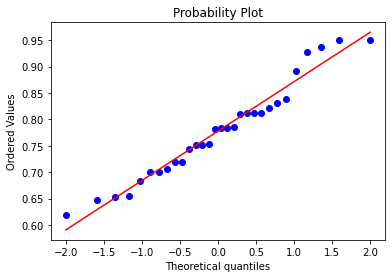

In [99]:
stats.probplot(results["AUCupc"], dist="norm", plot=plt)

In [100]:
from scipy.stats import mannwhitneyu

In [101]:
print(mannwhitneyu(results['accuracy'], results['accuracyup']))
print(mannwhitneyu(results['precision'], results['precisionup']))
print(mannwhitneyu(results['recall'], results['recallup']))
print(mannwhitneyu(results['f1 score'], results['f1 scoreup']))
print(mannwhitneyu(results['AUC'], results['AUCup']))

MannwhitneyuResult(statistic=324.5, pvalue=0.03228618395188584)
MannwhitneyuResult(statistic=48.5, pvalue=1.5242367440731373e-09)
MannwhitneyuResult(statistic=2.0, pvalue=1.8379958658743424e-11)
MannwhitneyuResult(statistic=0.0, pvalue=1.5052036854815442e-11)
MannwhitneyuResult(statistic=35.0, pvalue=4.431247055773688e-10)


In [102]:
print(mannwhitneyu(results['accuracyt'], results['accuracyupt']))
print(mannwhitneyu(results['precisiont'], results['precisionupt']))
print(mannwhitneyu(results['recallt'], results['recallupt']))
print(mannwhitneyu(results['f1 scoret'], results['f1 scoreupt']))
print(mannwhitneyu(results['AUCt'], results['AUCupt']))

MannwhitneyuResult(statistic=145.5, pvalue=3.478049518842776e-06)
MannwhitneyuResult(statistic=321.5, pvalue=0.029172925430288182)
MannwhitneyuResult(statistic=306.5, pvalue=0.01723897034775137)
MannwhitneyuResult(statistic=425.0, pvalue=0.3585774829607037)
MannwhitneyuResult(statistic=90.5, pvalue=5.5424175772148525e-08)


In [103]:
print(mannwhitneyu(results['accuracyc'], results['accuracyupc']))
print(mannwhitneyu(results['precisionc'], results['precisionupc']))
print(mannwhitneyu(results['recallc'], results['recallupc']))
print(mannwhitneyu(results['f1 scorec'], results['f1 scoreupc']))
print(mannwhitneyu(results['AUCc'], results['AUCupc']))

MannwhitneyuResult(statistic=209.5, pvalue=0.00019341969499138151)
MannwhitneyuResult(statistic=374.5, pvalue=0.13373140997382366)
MannwhitneyuResult(statistic=148.0, pvalue=4.130427719630095e-06)
MannwhitneyuResult(statistic=347.0, pvalue=0.06482445563356076)
MannwhitneyuResult(statistic=63.0, pvalue=5.4962825168058136e-09)
